# Linear Regression in StatsModels - Lab

## Introduction

It's time to apply the StatsModels skills from the previous lesson! In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:

* Perform a linear regression using StatsModels
* Evaluate a linear regression model using StatsModels
* Interpret linear regression coefficients using StatsModels

## Let's Get Started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

The columns in this dataset are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

## Step 1: Exploratory Data Analysis

In [15]:
# Load necessary libraries and import the data


In [59]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm


In [17]:
df = pd.read_csv('advertising.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Check the columns and first few rows


In [20]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# Generate summary statistics for data with .describe()

In [22]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [23]:
df.describe(include='all')

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Based on what you have seen so far, describe the contents of this dataset. Remember that our business problem is asking us to build a model that predicts sales.

# my observation 

Name: Advertising Dataset
Objective: Impact of advertisemnt cost in relation to sales 
Goal: Build a predictive model for sales based on advertising budgets

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from `head()`.
    
</details>

Now, use scatter plots to plot each predictor (TV, radio, newspaper) against the target variable.

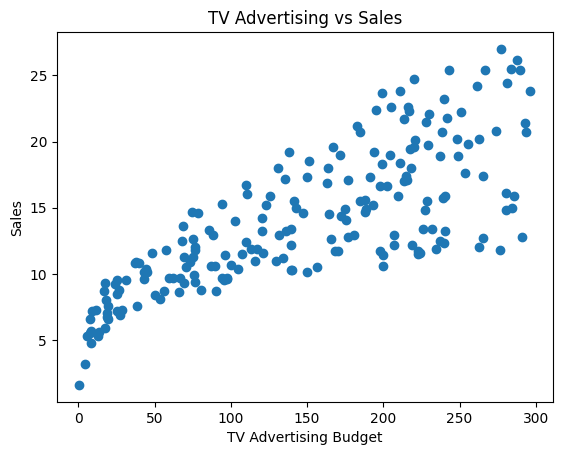

In [25]:
# Create figure with subplots
plt.scatter(df['TV'], df['sales'])
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

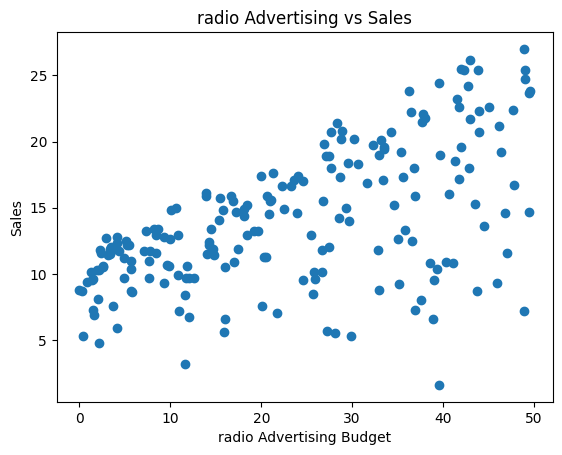

In [26]:
# Create figure with subplots
plt.scatter(df['radio'], df['sales'])
plt.title('radio Advertising vs Sales')
plt.xlabel('radio Advertising Budget')
plt.ylabel('Sales')
plt.show()

# Visualize the relationship between the preditors and the target using scatter plots

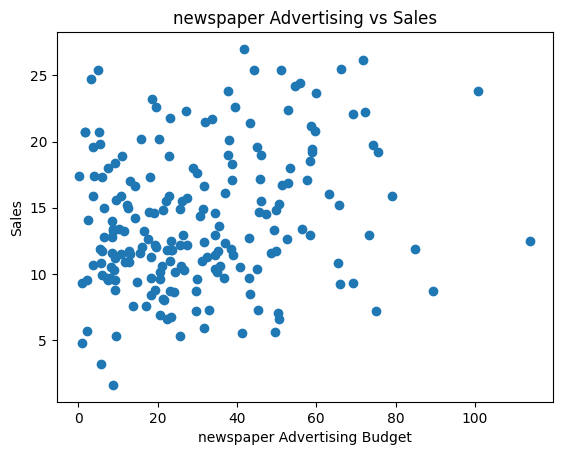

In [27]:
# Create figure with subplots
plt.scatter(df['newspaper'], df['sales'])
plt.title('newspaper Advertising vs Sales')
plt.xlabel('newspaper Advertising Budget')
plt.ylabel('Sales')
plt.show()

# it was noted that tv adversting agent shows positive relationship (associated) in relation to sales unlike radio and news paper advertising 

Does there appear to be a linear relationship between these predictors and the target?

# My observation on linearity

yes for tv and radio shows linearity  although tv indicate strong linearity, however newspaper doesnot show any linearity 

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

`TV` seems to be a good predictor because it has the most linear relationship with sales.

`radio` also seems to have a linear relationship, but there is more variance than with `TV`. We would expect a model using `radio` to be able to predict the target, but not as well as a model using `TV`.

`newspaper` has the least linear-looking relationship. There is a lot of variance as well. It's not clear from this plot whether a model using `newspaper` would be able to predict the target.
    
</details>

## Step 2: Run a Simple Linear Regression with `TV` as the Predictor

As the analysis above indicates, `TV` looks like it has the strongest relationship with `sales`. Let's attempt to quantify that using linear regression.

In [29]:
df['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [30]:
df['sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [31]:
x = df['TV']  # independent variable 
y = df['sales']  # dependent variable

# Fit the linear regression model using x and y from df
linear_model = sm.OLS(y, sm.add_constant(x)).fit()

print(linear_model.summary())  # print summary of regression


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           1.47e-42
Time:                        14:15:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Step 3: Evaluate and Interpret Results from Step 2

How does this model perform overall? What do the coefficients say about the relationship between the variables?

At no or zero TV advertisement sales would have been at $7.0326

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Overall the model and coefficients are **statistically significant**, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.61 i.e. **61% of the variance in the target variable can be explained by TV spending**.

The intercept is about 7.0, meaning that if we spent 0 on TV, we would expect sales of about 7k widgets (the units of `sales` are in thousands of widgets).

The `TV` coefficient is about 0.05, meaning that **for each additional &dollar;1k spent on TV (the units of `TV` are in thousands of dollars), we would expect to sell an additional 50 widgets**. (More precisely, 47.5 widgets.)

Note that all of these coefficients represent associations rather than causation. It's possible that better sales are what leads to more TV spending! Either way, `TV` seems to have a strong relationship with `sales`.

</details>

## Step 4: Visualize Model with `TV` as Predictor

Create at least one visualization that shows the prediction line against a scatter plot of `TV` vs. sales, as well as at least one visualization that shows the residuals.

# Plot the model fit (scatter plot and regression line)


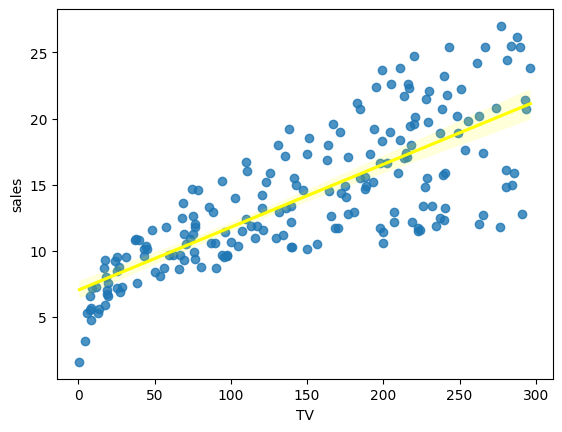

In [33]:
sns.regplot(x=x,y=y,line_kws={'color':'Yellow'})
plt.title
plt.ylabel
plt.xlabel
plt.show()

# plot the model residuals

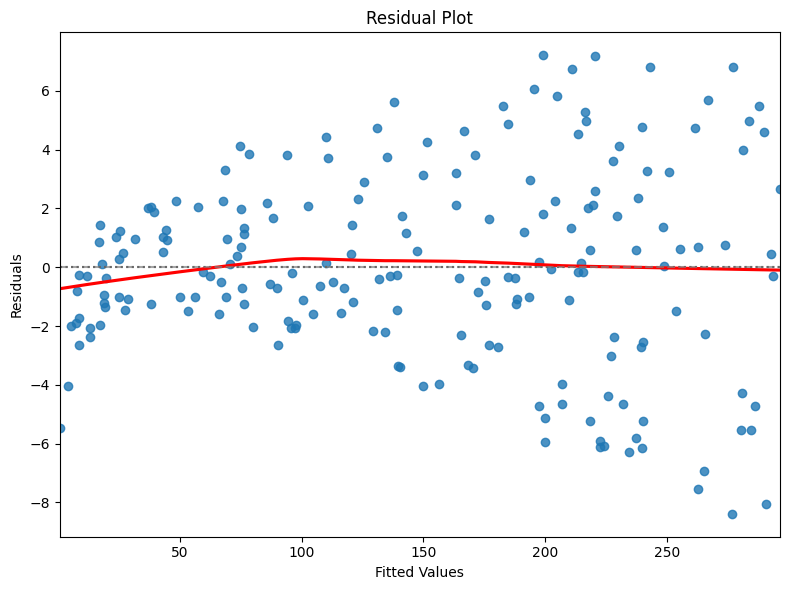

In [34]:
plt.figure(figsize=(8, 6))
sns.residplot(x=x, y=y, lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

plt.tight_layout()
plt.show()

## Step 5: Repeat Steps 2-4 with `radio` as Predictor

Compare and contrast the model performance, coefficient value, etc. The goal is to answer the business question described above.

In [35]:
# Run model

# Display results


In [36]:
df['radio']

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: radio, Length: 200, dtype: float64

In [37]:
df['newspaper']

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newspaper, Length: 200, dtype: float64

In [38]:
r = df['radio']  # independent variable 
y = df['sales']  # dependent variable

In [39]:
# Visualize model fit


In [40]:
r = df['radio']  # independent variable 
y = df['sales']  # dependent variable

# Fit the linear regression model using x and y from df
linear_model2 = sm.OLS(y, sm.add_constant(r)).fit()

print(linear_model2.summary())  # print summary of regression

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           4.35e-19
Time:                        14:15:23   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

In [41]:
r = df['radio']  # independent variable 
y = df['sales']  # dependent variable

In [42]:
# Visualize residuals


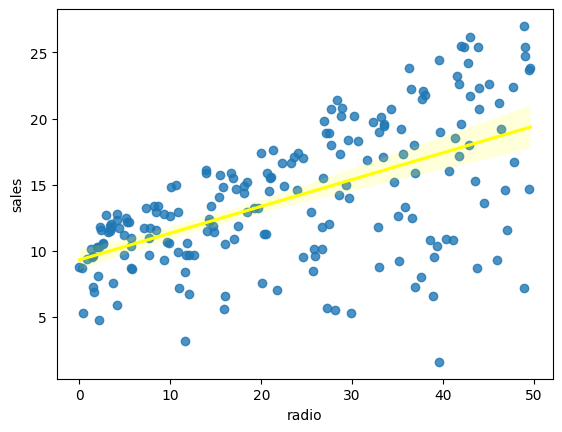

In [43]:
sns.regplot(x=r,y=y,line_kws={'color':'Yellow'})
plt.title
plt.ylabel
plt.xlabel
plt.show()

In [44]:
# Your interpretation here

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Same as with `TV`, the model using `radio` to predict `sales` as well as its parameters are **statistically significant** (p-values well below 0.05).

However, this model explains less of the variance. It only **explains about 33% of the variance in `sales`**, compared to about 61% explained by `TV`. If our main focus is the percentage of variance explained, this is a worse model than the `TV` model.

On the other hand, the coefficient for `radio` is much higher. **An increase of &dollar;1k in radio spending is associated with an increase of sales of about 200 widgets!** This is roughly 4x the increase of widget sales that we see for `TV`.

Visualizing this model, it doesn't look much different from the `TV` model.
    
So, how should we answer the business question? Realistically, you would need to return to your stakeholders to get a better understanding of what they are looking for. Do they care more about the variable that explains more variance, or do they care more about where an extra &dollar;1k of advertising spending is likely to make the most difference?

</details>

## Step 6: Repeat Steps 2-4 with `newspaper` as Predictor

Once again, use this information to compare and contrast.

In [45]:
# Run model

# Display results


In [46]:
n = df['newspaper']  # independent variable 
y = df['sales']  # dependent variable

# Fit the linear regression model using x and y from df
linear_model3 = sm.OLS(y, sm.add_constant(n)).fit()

print(linear_model3.summary())  # print summary of regression

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 27 Dec 2025   Prob (F-statistic):            0.00115
Time:                        14:15:24   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

In [47]:
# Visualize model fit


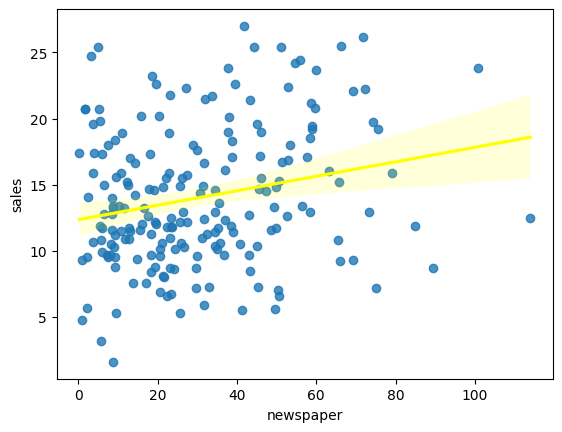

In [48]:
sns.regplot(x=n,y=y,line_kws={'color':'Yellow'})
plt.title
plt.ylabel
plt.xlabel
plt.show()

In [49]:
# Visualize residuals


In [52]:
df['radio']

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: radio, Length: 200, dtype: float64

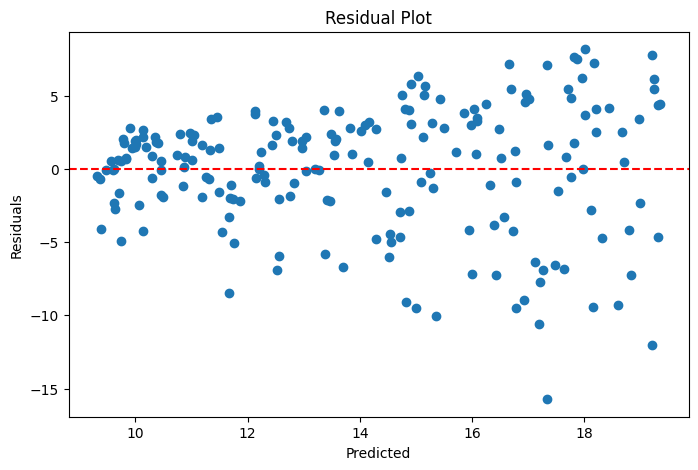

In [57]:

# Your data
X = df[['radio']]
y = df['sales']

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred
std_residuals = (residuals - residuals.mean()) / residuals.std()

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y - y_pred)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

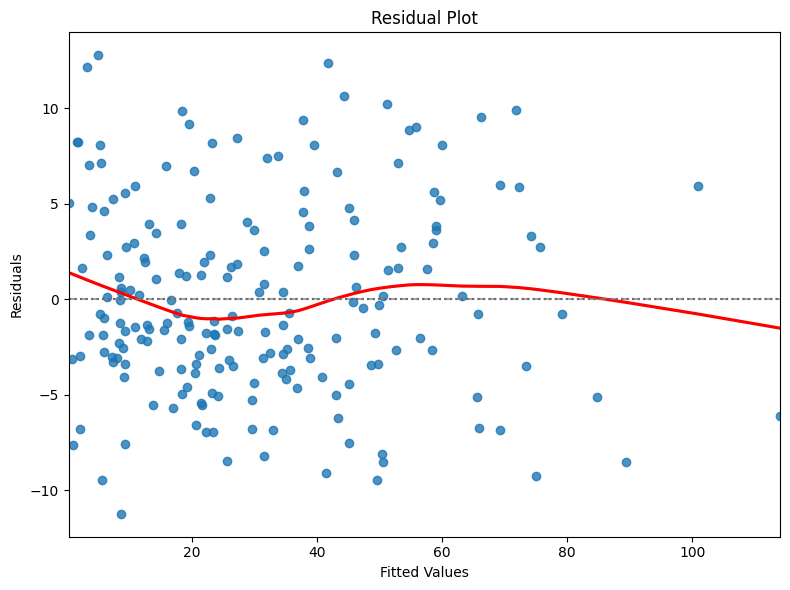

In [54]:
plt.figure(figsize=(8, 6))
sns.residplot(x=n, y=y, lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

plt.tight_layout()
plt.show()

In [55]:
# Your interpretation here

With R-squared of 52% meaning more than fifty percent of sales are attributed to newspaper and with p-value less than alpha at 0.05. i reject null hypothesis that state no relationship between sales inrelation to newspaper advert

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Technically our model and coefficients are **still statistically significant** at an alpha of 0.05, but the p-values are much higher. For both the F-statistic (overall model significance) and the `newspaper` coefficient, our p-values are about 0.001, meaning that there is about a 0.1% chance that a variable with _no linear relationship_ would produce these statistics. That is a pretty small false positive rate, so we'll consider the model to be statistically significant and move on to interpreting the other results.

The R-Squared here is the smallest we have seen yet: 0.05. This means that **the model explains about 5% of the variance in `sales`**. 5% is well below both the `radio` model (33%) and the `TV` model (61%).

The coefficient is also small, though similar to the `TV` coefficient. **An increase of &dollar;1k in newspaper spending is associated with about 50 additional widget sales** (more precisely, about 54.7). This is still much less than the 200-widget increase associated with &dollar;1k of additional `radio` spending.

Visualizing this model, the best-fit line is clearly not a strong predictor. On the other hand, the residuals exhibit _homoscedasticity_, meaning that the distribution of the residuals doesn't vary much based on the value of `newspaper`. This contrasts with the `radio` and `TV` residuals which exhibit a "cone" shape, where the errors are larger as the x-axis increases. Homoscedasticity of residuals is a good thing, which we will describe more in depth when we discuss regression assumptions.

Once again, how should we answer the business question? Regardless of the framing, it is unlikely that `newspaper` is the answer that your stakeholders want. This model has neither the highest R-Squared nor the highest coefficient.

</details>

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used StatsModels to perform linear regression and evaluated your models using statistical metrics as well as visualizations. You also reached a conclusion about how you would answer a business question using linear regression.